# Exercício 3

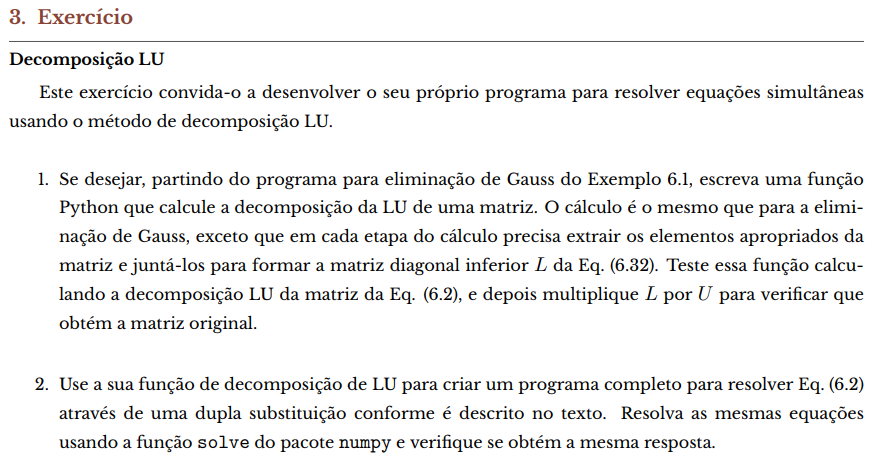

Aqui está a resolução das duas primeiras alíneas usando fatorização de Crout, a decomposição LU usando eliminação gaussiana está feita no outro ficheiro relativo ao exercício 3.

In [27]:
import numpy as np

## Alínea 1

Rescrevemos as equações ([Ver mais](https://www.notion.so/guilhermebaos/10-Decomposi-o-LU-f67b4bf846f1473d97f1b294a2442928?pvs=4#7725df887ded42f4a2f28c4d9215eb15)) do seguinte modo:

$$
\begin{align*}

\ell_{ji} &= a_{ji} - \sum_{k=0}^{i-1}\ell_{jk} u_{ki} \quad\quad\quad\quad&\text{Avaliado para }j \ge i
\\\\

u_{ij} &= \frac1{\ell_{ii}}\left(a_{ij} - \sum_{k=0}^{i-1}\ell_{ik} u_{kj}\right) \quad\quad\quad\quad&\text{Avaliado para }j > i

\end{align*}
$$

Agora começamos a contar em 0 !

In [28]:
def lucrout(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
        Dado uma matriz A calcula a sua decomposição LU sem pivotagem usando fatorização de Crout.

        ### Retorno
        Devolve um tuplo da forma (L, U).
    """

    N = A.shape[0]
    L, U = np.zeros((N, N)), np.identity(N)
    
    for i in range(N):
        L[i:N, i] = A[i:N, i] - L[i:N, :i] @ U[:i, i]
        U[i, i+1:N] = (A[i, i+1:N] - L[i, :i] @ U[:i, i+1:N]) / L[i][i]
    
    return L, U

# Versão mais legível:
'''
N = A.shape[0]
L, U = np.zeros((N, N)), np.identity(N)

for i in range(N):
    for j in range(i, N):
        L[j][i] = A[j][i] - L[j, :i] @ U[:i, i]
    
    div = L[i][i]
    for j in range(i + 1, N):
        U[i][j] = (A[i][j] - L[i, :i] @ U[:i, j]) / div

return L, U
'''

'\nN = A.shape[0]\nL, U = np.zeros((N, N)), np.identity(N)\n\nfor i in range(N):\n    for j in range(i, N):\n        L[j][i] = A[j][i] - L[j, :i] @ U[:i, i]\n    \n    div = L[i][i]\n    for j in range(i + 1, N):\n        U[i][j] = (A[i][j] - L[i, :i] @ U[:i, j]) / div\n\nreturn L, U\n'

In [29]:
A = np.array([[2, 1, 4, 1], [3, 4, -1, -1], [1, -4, 1, 5], [2, -2, 1, 3]], dtype=np.float64)
bb = np.array([-4, 3, 9, 7], dtype=np.float64)

L, U = lucrout(A)
print(A)
print(L @ U)
print(L)
print(U)


[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
[[  2.    0.    0.    0. ]
 [  3.    2.5   0.    0. ]
 [  1.   -4.5 -13.6   0. ]
 [  2.   -3.  -11.4  -1. ]]
[[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [ 0.   0.   1.  -0. ]
 [ 0.   0.   0.   1. ]]


In [30]:
def lusolve(Ao: np.ndarray, bbo: np.ndarray) -> np.ndarray:
    """
        Resolve o sistema de D equações definido por A * xx = bb usando decomposição LU sem pivotagem.

        ### Retorno
        Devolve um array que contém o vetor solução.
    """

    # Evitar side effects
    A = np.copy(Ao)
    bb = np.copy(bbo)

    N = len(bb)

    # Obter a decomposição LU
    L, U = lucrout(A)

    # Substituição progressiva -> Resolver L * yy = bb
    yy = np.zeros(N)
    yy[0] = bb[0] / L[0, 0]
    for i in range(1, N):
        yy[i] = (bb[i] - (L[i, :i] @ yy[:i])) / L[i][i]
    
    # Substituição regressiva -> Resolver U * xx = yy
    xx = np.zeros(N)
    xx[-1] = yy[-1] / U[N-1, N-1]
    for i in range(N-1, -1, -1):
        xx[i] = (yy[i] - (U[i][i+1:] @ xx[i+1:])) / U[i][i]
    
    return xx

In [31]:
print(lusolve(A, bb))
print(np.linalg.solve(A, bb))

[ 2. -1. -2.  1.]
[ 2. -1. -2.  1.]
